In [7]:
#MNISTデータの読み込みと加工
import numpy as np
#keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
#MNISTデータセットをインポート
from keras.datasets import mnist
#MNISTデータセットの読み込み
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#訓練データ
#60000*28*28の3次元配列を60000*784の2次元配列に変換
x_train=x_train.reshape(60000,784)
#訓練データをfloat32(浮動小数点)型に変換
x_train=x_train.astype("float32")
#データを255で割って0から1.0の範囲に変換
x_train=x_train/255
#正解ラベルの数
correct=10
#正解ラベルを1-of-K符号化法で変換
#例[2,3,...,1]⇛[[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],...,[0,1,0,0,0,0,0,0,0,0]]
y_train=np_utils.to_categorical(y_train,correct)
#print(y_train[0])

#テストデータ
#10000*28*28の3次元配列を10000*784の2次元配列に変換
x_test=x_test.reshape(10000,784)
#テストデータをfloat32(浮動小数点)型に変換
x_test=x_test.astype("float32")
#データを255で割って0から1.0の範囲に変換
x_test=x_test/255
#正解ラベルを1-of-K符号化法で変換
y_test=np_utils.to_categorical(y_test,correct)

In [2]:
#Kerasによるニューラルネットワークの実装

from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

#ニューラルネットワークのインスタンス化
model=Sequential()#Sequentialのインスタンス化
model.add(Dense(200,#隠れ層のニューロン数
               input_dim=784,#入力層のニューロン数
               activation="sigmoid"#活性化関数ReLUだと学習ができなかったためsigmoid関数に変更
               ))

#Dense(ニューロンの数,input_dim=入力されるニューロンの数,activation="活性化関数の種類")

model.add(Dense(10,#出力層のニューロン数
               activation="sigmoid"#活性化関数はシグモイド関数
               ))

model.compile(
    loss="categorical_crossentropy",#損失の基準は交差エントロピー誤差
    optimizer=Adam(),#学習方法はAdam
    metrics=["accuracy"]#学習評価として正解率を指定
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [3]:
import time
import matplotlib.pyplot as plt

startTime=time.time()
history=model.fit(x_train,
                  y_train,
                  epochs=5,
                  batch_size=100,
                  verbose=1,
                  validation_data=(
                     x_test,
                     y_test
                  ))

score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])
print("Time:{0:.3f} sec".format(time.time()-startTime))



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.5054 - accuracy: 0.8783 - val_loss: 0.2680 - val_accuracy: 0.9244
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2349 - accuracy: 0.9340 - val_loss: 0.2019 - val_accuracy: 0.9411
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1831 - accuracy: 0.9475 - val_loss: 0.1663 - val_accuracy: 0.9502
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1505 - accuracy: 0.9572 - val_loss: 0.1474 - val_accuracy: 0.9560
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1263 - accuracy: 0.9641 - val_loss: 0.1250 - val_accuracy: 0.9632
Test loss: 0.12497105907648802
Test accuracy: 0.9631999731063843
Time:27.369 sec


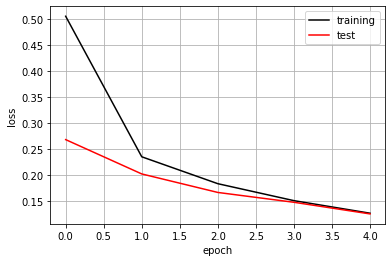

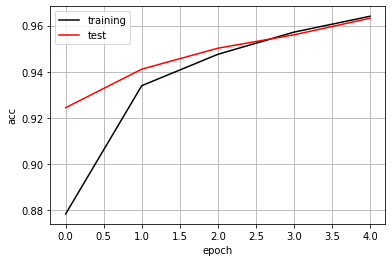

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],
         label="training",
         color="black")
plt.plot(history.history["val_loss"],
         label="test",
         color="red")
plt.ylim=(0,1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history.history["accuracy"],
         label="training",
         color="black")
plt.plot(history.history["val_accuracy"],
         label="test",
         color="red")
plt.ylim=(0.5,1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()


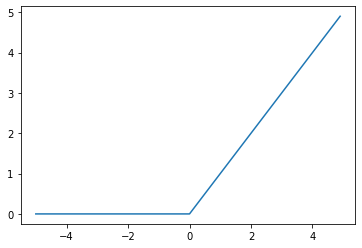

In [5]:
#ReLU関数
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)
plt.plot(x,y)
plt.show()